# Tarea 10. Seguimiento de Trayectoria
Marco Antonio Esquivel Basaldua

In [1]:
import numpy as np
import control as ctr
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

## Sistema en Variables de Estado
$$
\dot{x}=\left[\begin{matrix}
2 & -5 & -2\\
-1 & -4 & -3\\
3 & 4 & 4
\end{matrix}\right]x +
\left[\begin{matrix}
1\\1\\-1
\end{matrix}\right]u
$$
$$
y=\left[\begin{matrix}1 & -2 & -1\end{matrix}\right]x
$$

In [2]:
A = np.array([[2.,-5.,-2.],[-1.,-4.,-3.,],[3.,4.,4.,]])
B = np.array([[1.],[1.],[-1.]])
C = np.array([[1.,-2.,-1]])

## Estabilidad del sistema
Se calculan los eigenvalores de la matriz $A$ para comprobar la estabilidad del sistema. Ya que se obtiene un eigenvalor con parte real positiva se concluye que el sistema es inestable.
$$s_1 = 3.0796$$
$$s_2 = -0.5398 +0.18258$$
$$s_3 = -0.5398 -0.18258$$

In [3]:
print(np.linalg.eigvals(A))

[ 3.07959562+0.j         -0.53979781+0.18258225j -0.53979781-0.18258225j]


## Cantrolabilidad
Se construye la matriz de controlabilidad $\mathcal{C}$. Calculando su determinante se verifica si el sistema es controlable o no.
\begin{split}
	\mathcal{C} &= [B\ AB\ A^2B]\\
	&=\left[\begin{matrix}
		1 & -1 & 2\\
		1 & -2 & 0\\
		-1 & 3 & 1
	\end{matrix}\right]
	\end{split}
    
$$det(\mathcal{C})=1\neq 0$$

In [4]:
C_ = np.array([B, A.dot(B), A.dot(A.dot(B))]).T
print('C_= ',C_)
print('det(C_)= ',np.linalg.det(C_))

C_=  [[[ 1. -1.  2.]
  [ 1. -2.  0.]
  [-1.  3.  1.]]]
det(C_)=  [1.]


## Transformacion a la forma canonical controlable
\begin{split}
	e = \left[\begin{matrix}
	e_1\\e_2\\e_3
	\end{matrix}\right]=&
	\left[\begin{matrix}
	-1 & 2 & 1\\
	-1 & 1 & 0\\
	-3 & 1 & -1
	\end{matrix}\right]x +
	\left[\begin{matrix}
	r\\\dot{r}\\\ddot{r}
	\end{matrix}\right]\\
	=&-Tx+p
	\end{split}
    
Para que la transformacion se valida $T$ debe ser una matriz no singular, es decir
$$det(T)\neq 0$$

In [5]:
T = -np.array([[-1.,2.,1.],[-1.,1.,0.,],[-3.,1.,-1.,]])
print('det(T)',np.linalg.det(T))

A_c = T.dot(A.dot(np.linalg.inv(T)))
print('A_c= ',A_c)

B_c = T.dot(B)
print('B_c= ',B_c)

det(T) -1.0000000000000002
A_c=  [[ 4.44089210e-16  1.00000000e+00  4.44089210e-16]
 [ 4.44089210e-16 -1.77635684e-15  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  2.00000000e+00]]
B_c=  [[0.]
 [0.]
 [1.]]


## Forma general de la transformacion
$$T=(\mathcal{CW})^{-1}$$
	Donde $\mathcal{C}$ es la matriz de controlabilidad calculada en la primer secci\'on y 
	$$\mathcal{W}=\left[\begin{matrix}
	a_{n-1} & a_{n-2} & a_{n-3} & \cdots & a_1 & 1\\
	a_{n-2} & a_{n-3} & a_{n-4} & \cdots & 1 & 0\\
	a_{n-2} & a_{n-3} & \cdots & 1 & \cdots & 0\\
	\vdots & & \vdots & \ddots & \vdots & \\
	1 & 0 & 0 & 0 &\cdots & 0 
	\end{matrix}\right]
	$$
    En este caso se tiene $a_1=-2$, $a_2=-3$, $a_3=-1$.
	$$\mathcal{W}=\left[\begin{matrix}
	-3 & -2 & 1\\
	-2 & 1 & 0\\
	1 & 0 & 0
	\end{matrix}\right]
    $$
    Y se comprueba que
	$$T=(\mathcal{CW})^{-1}=
	\left[\begin{matrix}
	1 & -2 & -1\\
	1 & -1 & 0\\
	3 & -1 & 1
	\end{matrix}\right]
    $$

In [6]:
W = np.array([[-3.,-2.,1.,],[-2.,1.,0.,],[1.,0.,0.,]])
T = np.linalg.inv(C_.dot(W))
print(T)

[[[ 1. -2. -1.]
  [ 1. -1. -0.]
  [ 3. -1.  1.]]]


## Sistema de error en su forma general
El sistema de error se escribe como
\begin{split}
	\dot{e} =& T\dot{x}+\dot{p}\\
	=& TAT^{-1}e+TBu-TAT^{-1}p+\dot{p}\\
	=& A_ce+B_cu-A_cp+\dot{p}
	\end{split}
    
Con
$$
	A_c=\left[\begin{matrix}
	0 & 1 & 0\\
	0 & 0 & 1\\
	1 & 3 & 2
	\end{matrix}\right]
	$$
	$$
	B_c = \left[\begin{matrix}
	0\\0\\1
	\end{matrix}\right]
	$$
Por tanto el sistema de error se escribe como
	$$
	\dot{e} = \left[\begin{matrix}
	0 & 1 & 0\\
	0 & 0 & 1\\
	1 & 3 & 2
	\end{matrix}\right]\left[\begin{matrix}
	e_1\\e_2\\e_3
	\end{matrix}\right] + \left[\begin{matrix}
	0\\0\\1
	\end{matrix}\right]u -\left[\begin{matrix}
	0 & 1 & 0\\
	0 & 0 & 1\\
	1 & 3 & 2
	\end{matrix}\right]\left[\begin{matrix}
	r\\\dot{r}\\\ddot{r}
	\end{matrix}\right] +\left[\begin{matrix}
	\dot{r}\\\ddot{r}\\\dddot{r}
	\end{matrix}\right]
	$$

## Implementacion

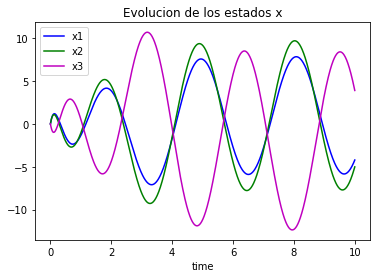

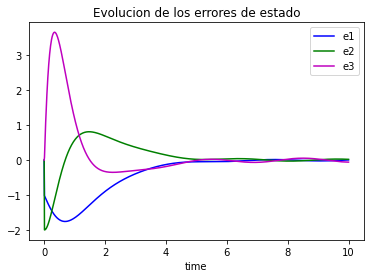

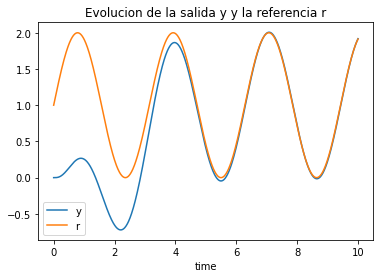

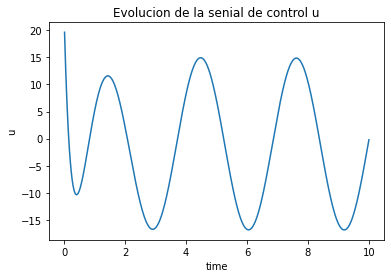

In [38]:
# tiempo de implementacion
t = np.linspace(0,10,1001)

# Diferencial de tiempo
dt = t[1] - t[0]

# condicion inicial
x = np.array([[0.],[0.],[0.]])

k = ctr.acker(A_c,B_c,[-1,-2,-3])

all_x = np.zeros((3, len(t)))
all_e = np.zeros((3, len(t)))
all_y = np.zeros(len(t))
all_r = np.zeros(len(t))
all_u = np.zeros(len(t)-1)

all_x[0,0] = x[0]
all_x[1,0] = x[1]
all_x[2,0] = x[2]

y = C.dot(x)
all_y[0] = y[0,0]
all_r[0] = 1. + np.sin(2*t[0])

for i in range(1,len(t)):
    # Referencia y derivadas
    r = 1. + np.sin(2*t[i])
    dr = 2. * np.cos(2*t[i])
    ddr = -4. * np.sin(2*t[i])
    dddr = -8. * np.cos(2*t[i])
    
    p = np.array([[r],[dr],[ddr]])
    pc = A_c.dot(p) - np.array([[dr],[ddr],[dddr]])
    #print(pc)
    
    e = T.dot(x) - p
    #print(e[0])
    u = -k.dot(e) - pc[2,0]
    #print(u[0,0])
    y = C.dot(x)
    x = x + dt*(A.dot(x) + B*u[0,0])
    #print(x)
    
    all_x[0,i] = x[0]
    all_x[1,i] = x[1]
    all_x[2,i] = x[2]
    
    all_e[0,i] = e[0,0]
    all_e[1,i] = e[0,1]
    all_e[2,i] = e[0,2]
    
    all_y[i] = y[0,0]
    all_r[i] = r
    all_u[i-1] = u[0,0]


plt.plot(t,all_x[0,:], 'b', label='x1')
plt.plot(t,all_x[1,:], 'g', label='x2')
plt.plot(t,all_x[2,:], 'm', label='x3')
plt.title('Evolucion de los estados x')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

plt.plot(t,all_e[0,:], 'b', label='e1')
plt.plot(t,all_e[1,:], 'g', label='e2')
plt.plot(t,all_e[2,:], 'm', label='e3')
plt.title('Evolucion de los errores de estado')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

plt.plot(t,all_y, label='y')
plt.plot(t,all_r, label='r')
plt.title('Evolucion de la salida y y la referencia r')
plt.legend(loc='best')
plt.xlabel('time')
plt.show()

plt.plot(t[1:],all_u)
plt.title('Evolucion de la senial de control u')
plt.ylabel('u')
plt.xlabel('time')
plt.show()